# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## *Functions*

In [12]:
#Read CSVs
def get_data():
    """
    Get training, validation and test data
    """
    train = pd.read_csv("./PA1_train.csv")
    dev = pd.read_csv("./PA1_dev.csv")
    test = pd.read_csv("./PA1_test.csv")
    return train,dev,test

#Add bias
def add_bias(df):
    """
    Add dummy variable to control intercept
    """
    df["dummy"] = 1
    return df

#Seperate Features from response
def seperate(df_train):
    """
    input: dataframe
    """
    #Grab all continuous features
    x = df_train.iloc[:,0:-1]
    #Split dates
    x = split_date(x)
    x = x.drop(["date"], axis=1)
    #Grab response y
    y = df_train.iloc[:,-1]
    
    return x,y
    
    
#Add new features [Month, Day, Year]
def split_date(df_train):
    """
    splits date into seperate features
    input: dataframe
    """
    print("Splitting date...")
    for i in range(0,len(df_train)):
        df_train.loc[i,"month"] = int(df_train.loc[i,"date"].split("/")[0])
        df_train.loc[i,"day"] = int(df_train.loc[i,"date"].split("/")[1])
        df_train.loc[i,"year"] = int(df_train.loc[i,"date"].split("/")[2])
    print("Done")
    return df_train

#Normalize data
def normalize(df1):
    """
    Normalizes feature matrix
    input: feature df
    """
    print("Normalizing...")
    x = (df1 - np.min(df1))/(np.max(df1) - np.min(df1))
    print("DONE")
    return x

#Linear regression function
def linear_regress(x,y,eta,t,lamb):
    """
    x: input/features
    y: opuput
    eta: learning rate
    t: iterations
    lamb: regularization constant
    """
    print(f'#Learning Rate : {eta}#####')
    
    n = 0
    e = np.zeros(len(y))
    errors = []
    gradient = []
    
    #Initialize weights [w] and predictions [y_hat]
    w = np.zeros(len(x[0]))
    
    cur_grad = 0
    prev_grad = 0
     
    while n<t:
        #Initialize gradient for each epoch
        gradient_vector = np.zeros(len(x[0]))
        
        """        
        #Traverse through each data point   
        for i in range(len(x)):
            #Predicted value
            y_hat = np.dot(w.T,x[i])

            #Error
            e[i] = ((y[i] - y_hat)**2)
            
            
            #Regularization
            if np.dot(w.T,w) == 0:
                r = 0
            else:
                r = (np.dot(w.T,w))**0.5
            
            #Traverse through each feature to update corresponding weights
            #for j in range(len(x[0])):
            #    gradient_vector[j] += ((-2)*(y[i] - y_hat)*x[i,j]) + (2*lamb*r)
            gradient_vector += 
        """
        
        #y_hat = np.matmul(w.T, x)
        y_hat = np.matmul(x, w)
        e = (y-y_hat)**2
        
        gradient_vector = (-2)*np.matmul(x.T, (y-y_hat))  
        
        #Update weights
        w -=  eta*gradient_vector
        #Calculate SSE
        errors.append(sum(e))
        #Norm of gradient
        convergence_criteria = np.dot(gradient_vector.T,gradient_vector)**0.5
        gradient.append(convergence_criteria)
        
        ####
        #print(f'#####Iteration : {n+1}#####')
        #print(f'Gradient : {gradient[n]}')

        
        ####
        if (gradient[n]/(10**9)) > 1 and (n+1) <= 6:
            t = 8
        
        n += 1
        if convergence_criteria < 0.5:
            print(f'#Iteration : {n}#####')
            print(f'Gradient : {gradient[n-1]}')
            print()
            print()
            print()
            return w,errors,gradient, n
        if (n) % 5000 == 0:
            print(f'#Iteration : {n}#####')
            print(f'Gradient : {gradient[n-1]}')

    print(f'#Iteration : {n}#####')
    print(f'Gradient : {gradient[n-1]}')
    print()
    print()
    print()
    return w,errors,gradient, n

In [3]:
#####DATA PREP#####

#load csv
df_train,df_dev,df_test = get_data()
#Drop ID Feature
df_train = df_train.drop("id", axis=1)

#Grab features and Response
x,y = seperate(df_train)

#Normalize continuous features
x_norm_df = normalize(x)
#Add Bias 
x_norm_df = add_bias(x_norm_df)
x_norm = x_norm_df.values

x_norm_df

Splitting date...
Done
Normalizing...
DONE


,dummy,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day,year
0,1,0.09375,0.275862,0.246849,0.005715,0.4,0.0,0.0,0.50,0.555556,...,0.773913,0.0,0.368687,0.761782,0.394979,0.400000,0.011601,0.545455,0.266667,0.0
1,1,0.03125,0.275862,0.234244,0.002682,0.0,0.0,0.0,1.00,0.444444,...,0.226087,0.0,0.631313,0.683127,0.112971,0.318584,0.004985,0.545455,0.566667,0.0
2,1,0.12500,0.172414,0.134454,0.001471,0.2,0.0,0.0,0.50,0.444444,...,0.017391,0.0,0.722222,0.707093,0.174059,0.226549,0.003837,0.545455,0.200000,0.0
3,1,0.09375,0.172414,0.141807,0.005469,0.0,0.0,0.0,0.75,0.444444,...,0.600000,0.0,0.292929,0.515522,0.300418,0.212389,0.011556,0.272727,0.900000,1.0
4,1,0.15625,0.241379,0.363445,0.006426,0.0,0.0,0.5,1.00,0.555556,...,0.539130,0.0,0.035354,0.690043,0.335565,0.361062,0.011188,0.727273,0.100000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0.09375,0.275862,0.231092,0.013111,0.4,0.0,0.0,1.00,0.333333,...,0.504348,0.0,0.292929,0.526621,0.298745,0.353982,0.006746,0.727273,0.833333,0.0
9996,1,0.00000,0.068966,0.044118,0.007566,0.0,0.0,0.0,0.50,0.222222,...,0.365217,0.0,0.843434,0.540454,0.169874,0.138053,0.007440,0.454545,0.100000,0.0
9997,1,0.06250,0.137931,0.122899,0.004200,0.0,0.0,0.0,1.00,0.333333,...,0.530435,0.0,0.777778,0.966061,0.158159,0.304425,0.008033,0.181818,0.533333,1.0
9998,1,0.06250,0.241379,0.157563,0.000804,0.8,0.0,0.0,0.50,0.444444,...,0.939130,0.0,0.515152,0.800708,0.145607,0.217699,0.001188,0.909091,0.566667,0.0


In [ ]:
weights1, sse1, gradient1, iter1 = linear_regress(x_norm, y, 10**0,  200000, 0)
weights2, sse2, gradient2, iter2 = linear_regress(x_norm, y, 10**-1, 200000, 0)
weights3, sse3, gradient3, iter3 = linear_regress(x_norm, y, 10**-2, 200000, 0)
weights4, sse4, gradient4, iter4 = linear_regress(x_norm, y, 10**-3, 200000, 0)
weights5, sse5, gradient5, iter5 = linear_regress(x_norm, y, 10**-4, 200000, 0)
weights6, sse6, gradient6, iter6 = linear_regress(x_norm, y, 10**-5, 500000, 0)
weights7, sse7, gradient7, iter7 = linear_regress(x_norm, y, 10**-6, 5000000, 0)
weights8, sse8, gradient8, iter8 = linear_regress(x_norm, y, 10**-7, 50000000, 0)


#Learning Rate : 1#####
#Iteration : 8#####
Gradient : 1.472848576615808e+39



#Learning Rate : 0.1#####
#Iteration : 8#####
Gradient : 1.471497501080642e+32



#Learning Rate : 0.01#####
#Iteration : 8#####
Gradient : 1.4580450660796086e+25



#Learning Rate : 0.001#####
#Iteration : 8#####
Gradient : 1.3292132020270461e+18



#Learning Rate : 0.0001#####
#Iteration : 8#####
Gradient : 48934078876.18486



#Learning Rate : 1e-05#####
#Iteration : 5000#####
Gradient : 66.01152097735797
#Iteration : 10000#####
Gradient : 38.74538928031949
#Iteration : 15000#####
Gradient : 23.6693192645556
#Iteration : 20000#####
Gradient : 14.82837923574096
#Iteration : 25000#####
Gradient : 9.656090738972635
#Iteration : 30000#####
Gradient : 6.624495278126791
#Iteration : 35000#####
Gradient : 4.814123451455354
#Iteration : 40000#####
Gradient : 3.6821167624107236
#Iteration : 45000#####
Gradient : 2.923342962753532
#Iteration : 50000#####
Gradient : 2.375962307231736
#Iteration : 55000#####
Gradien

#Iteration : 625000#####
Gradient : 1.4811168275932023
#Iteration : 630000#####
Gradient : 1.4542815514624428
#Iteration : 635000#####
Gradient : 1.4279670872843522
#Iteration : 640000#####
Gradient : 1.4021605406541413
#Iteration : 645000#####
Gradient : 1.376849544586504
#Iteration : 650000#####
Gradient : 1.3520222259397217
#Iteration : 655000#####
Gradient : 1.327667174369019
#Iteration : 660000#####
Gradient : 1.303773413615757
#Iteration : 665000#####
Gradient : 1.2803303749493167
#Iteration : 670000#####
Gradient : 1.2573278725970725
#Iteration : 675000#####
Gradient : 1.2347560810066898
#Iteration : 680000#####
Gradient : 1.2126055137986405
#Iteration : 685000#####
Gradient : 1.19086700427725
#Iteration : 690000#####
Gradient : 1.169531687377652
#Iteration : 695000#####
Gradient : 1.1485909829373913
#Iteration : 700000#####
Gradient : 1.1280365801889554
#Iteration : 705000#####
Gradient : 1.107860423377036
#Iteration : 710000#####
Gradient : 1.0880546984125619
#Iteration : 7150

#Iteration : 450000#####
Gradient : 70.60572319495868
#Iteration : 455000#####
Gradient : 70.10368337794408
#Iteration : 460000#####
Gradient : 69.61233958574664
#Iteration : 465000#####
Gradient : 69.13114797800819
#Iteration : 470000#####
Gradient : 68.65959831714709
#Iteration : 475000#####
Gradient : 68.19721180115397
#Iteration : 480000#####
Gradient : 67.74353903869631
#Iteration : 485000#####
Gradient : 67.2981581570552
#Iteration : 490000#####
Gradient : 66.86067303409098
#Iteration : 495000#####
Gradient : 66.43071164601697
#Iteration : 500000#####
Gradient : 66.00792452332463
#Iteration : 505000#####
Gradient : 65.59198330770849


In [27]:
sse1

[417729.13677477534,
 1441711259931547.5,
 6.794374698184466e+24,
 3.202181295174746e+34,
 1.5091845552447712e+44,
 7.112770364740612e+53,
 3.352240922803048e+63,
 1.579907494303781e+73]

In [60]:
#x_norm_df

Text(0, 0.5, 'SSE')

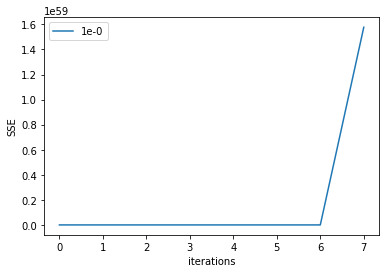

In [8]:
plt.plot(sse)
plt.legend(['1e-0'])
plt.xlabel('iterations')
plt.ylabel('SSE')